In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import time
from sklearn.cluster import AgglomerativeClustering

In [24]:
df = pd.read_csv('sizes3.csv')
df.head()

,x,y,class
0,9.28531,14.58790,0
1,12.39770,8.44890,0
2,8.73624,11.68030,0
3,9.10197,12.83270,0
4,12.29480,8.67373,0


In [25]:
df.isna().sum()

x        0
y        0
class    0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
 2   class   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [27]:
df.describe()

,x,y,class
count,1000.000000,1000.000000,1000.000000
mean,7.962190,7.639256,0.666000
std,4.547997,4.641045,1.054303
min,-5.681400,-6.073150,0.000000
25%,6.388598,6.039690,0.000000
50%,9.432605,9.067995,0.000000
75%,11.199375,10.813200,1.000000
max,15.953900,16.662500,3.000000


In [28]:
df.head()

,x,y,class
0,9.28531,14.58790,0
1,12.39770,8.44890,0
2,8.73624,11.68030,0
3,9.10197,12.83270,0
4,12.29480,8.67373,0


In [29]:
df['class'].value_counts()

class
0    667
1    111
2    111
3    111
Name: count, dtype: int64

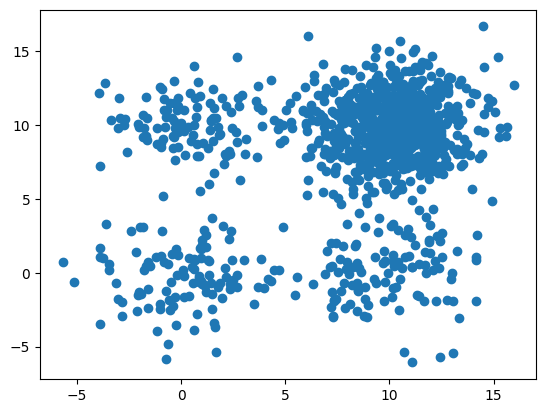

In [30]:
import matplotlib.pyplot as plt
plt.scatter(df['x'],df['y'])
plt.show()

In [31]:
x = df.drop(columns='class')
y = df['class']

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
# X_train, Y_train
# X_test, Y_test

In [33]:
# K-means clustering
start_time = time.time()
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X_train)
print("K-means clustering cluster time cost: %0.4s Seconds"%(time.time() - start_time))

K-means clustering cluster time cost: 0.00 Seconds


In [34]:
sse = kmeans.inertia_
print("SSE:", sse)

SSE: 6618.7255536119665


In [54]:
# map k mean cluster to y class
labels_kmeans = kmeans.labels_
y = []
for i in labels_kmeans:
    if i == 0:
        y.append(2)
    elif i == 1:
        y.append(0)
    elif i == 2:
        y.append(1)
    else:
        y.append(3)
accuracy = accuracy_score(Y_train, y)
print("Accuracy:", accuracy)

Accuracy: 0.9825


In [56]:
# Create a confusion matrix
conf_matrix = confusion_matrix(Y_train, labels_kmeans)

# Calculate the probability of each class
class_probabilities = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Calculate entropy
class_entropies = -np.sum(np.multiply(class_probabilities, np.log2(class_probabilities, where=(class_probabilities != 0))), axis=1)
overall_entropy = np.sum(class_entropies)

print(f"Class Entropies: {class_entropies}")
print(f"Overall Entropy: {overall_entropy}")

Class Entropies: [ 0.17676581 -0.          0.08807226  0.08728059]
Overall Entropy: 0.3521186555200932


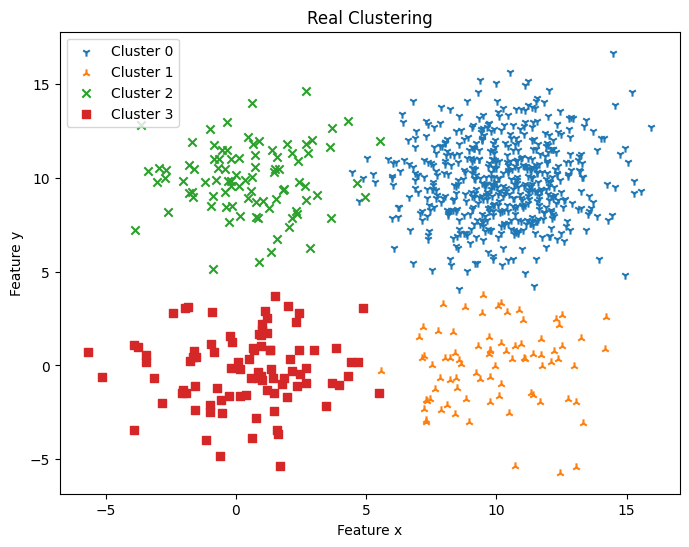

In [41]:
m = ['1', '2', 'x', 's']
plt.figure(figsize=(8, 6))
for i in range(kmeans.n_clusters):
    cluster_mask = (np.array(Y_train) == i)
    plt.scatter(X_train['x'][cluster_mask], X_train['y'][cluster_mask], label=f'Cluster {i}', marker=m[i])

plt.title("Real Clustering")
plt.xlabel("Feature x")
plt.ylabel("Feature y")
plt.legend()
plt.show()

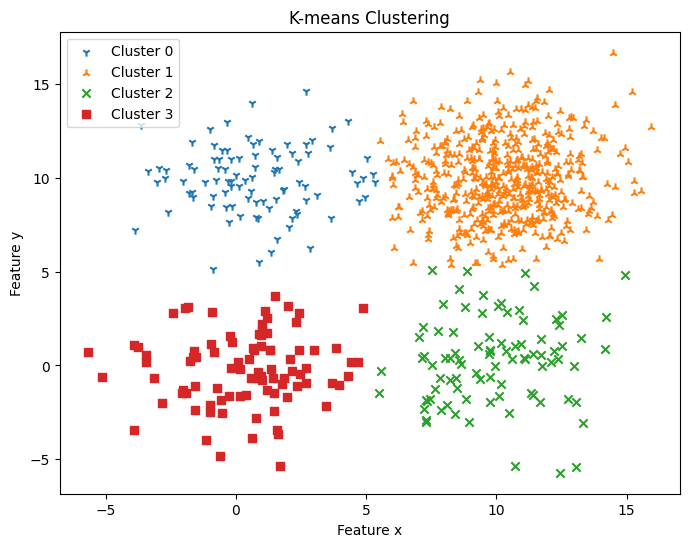

In [40]:
m = ['1', '2', 'x', 's']
plt.figure(figsize=(8, 6))
for i in range(kmeans.n_clusters):
    cluster_mask = (kmeans.labels_ == i)
    plt.scatter(X_train['x'][cluster_mask], X_train['y'][cluster_mask], label=f'Cluster {i}', marker=m[i])

plt.title("K-means Clustering")
plt.xlabel("Feature x")
plt.ylabel("Feature y")
plt.legend()
plt.show()

In [57]:
# hierarchical clustering
start_time = time.time()
clustering = AgglomerativeClustering(n_clusters=4)
print("Hierarchical clustering cluster time cost: %0.4s Seconds"%(time.time() - start_time))

Hierarchical clustering cluster time cost: 0.0 Seconds


In [59]:
from scipy.cluster.hierarchy import linkage, fcluster
labels = clustering.fit_predict(X_train)
linkage_matrix = linkage(X_train, method='ward')
n_clusters = 4
# Define the number of clusters you want
flat_clusters = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

# Calculate SSE manually
def calculate_sse(X, labels, flat_clusters):
    sse = 0
    for cluster in range(1, n_clusters + 1):
        cluster_points = X[flat_clusters == cluster]
        cluster_center = np.mean(cluster_points, axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    return sse

sse = calculate_sse(X_train, labels, flat_clusters)
print("SSE:", sse)

SSE: x    3367.556765
y    3366.759563
dtype: float64


C:\Users\Ken\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [60]:
labels = clustering.fit_predict(X_train)
accuracy = accuracy_score(Y_train, labels)
print("Accuracy:", accuracy)

Accuracy: 0.78


In [64]:
# map k mean cluster to y class
labels = clustering.fit_predict(X_train)
y = []
for i in labels:
    if i == 0:
        y.append(0)
    elif i == 1:
        y.append(3)
    elif i == 2:
        y.append(2)
    else:
        y.append(1)
accuracy = accuracy_score(Y_train, y)
print("Accuracy:", accuracy)

Accuracy: 0.99125


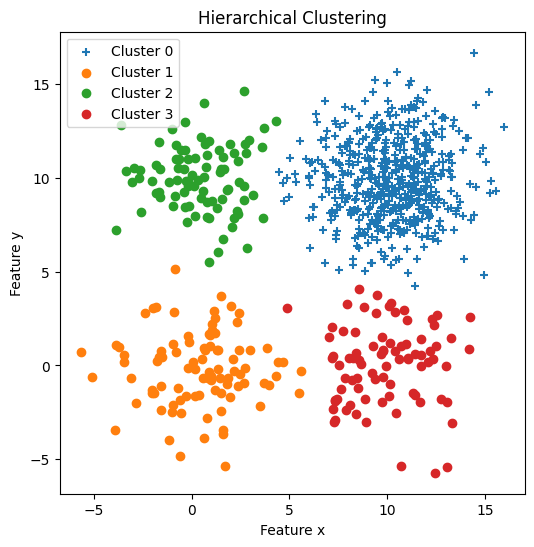

In [62]:
df_train = pd.DataFrame(X_train, columns=['x', 'y'])
df_train['hierarchical_label'] = clustering.fit_predict(X_train)
plt.figure(figsize=(6, 6))
for i in range(n_clusters):
    cluster_mask = (df_train['hierarchical_label'] == i)
    marker = '+' if i == 0 else 'o'
    plt.scatter(df_train['x'][cluster_mask], df_train['y'][cluster_mask], label=f'Cluster {i}', marker=marker)

plt.title("Hierarchical Clustering")
plt.xlabel("Feature x")
plt.ylabel("Feature y")
plt.legend()
plt.show()

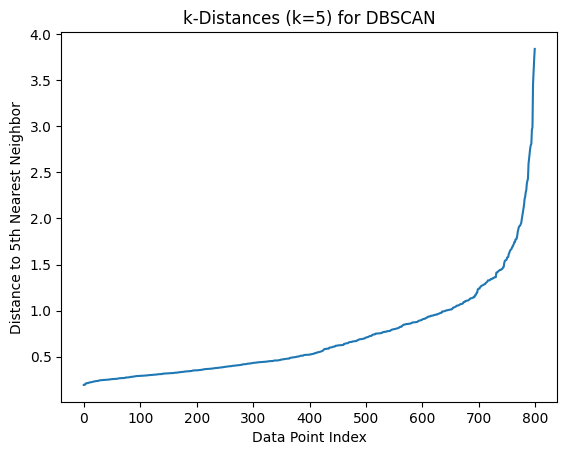

Best EPS: 1.5368707739831347, Best MinPts: 9, Best Silhouette Score: 0.5391508190182642


In [65]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Calculate k-distances
min_samples = 5
neigh = NearestNeighbors(n_neighbors=min_samples + 1)
neigh.fit(X_train)
distances, _ = neigh.kneighbors(X_train)
k_distances = distances[:, -1]

# Plot k-distances
sorted_distances = np.sort(k_distances)
plt.plot(sorted_distances)
plt.title(f'k-Distances (k={min_samples}) for DBSCAN')
plt.xlabel('Data Point Index')
plt.ylabel(f'Distance to {min_samples}th Nearest Neighbor')
plt.show()

# Silhouette Score calculation and optimization
best_eps = None
best_min_samples = None
best_silhouette_score = -1

eps_range = np.linspace(min(sorted_distances), max(sorted_distances), 20)
min_samples_range = range(2, 10)

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_train)

        # Calculate Silhouette Score only if there are at least two unique labels
        unique_labels = np.unique(labels)
        if len(unique_labels) > 1:
            silhouette_avg = silhouette_score(X_train, labels)
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print(f"Best EPS: {best_eps}, Best MinPts: {best_min_samples}, Best Silhouette Score: {best_silhouette_score}")


K-means clustering cluster time cost: 0.0 Seconds


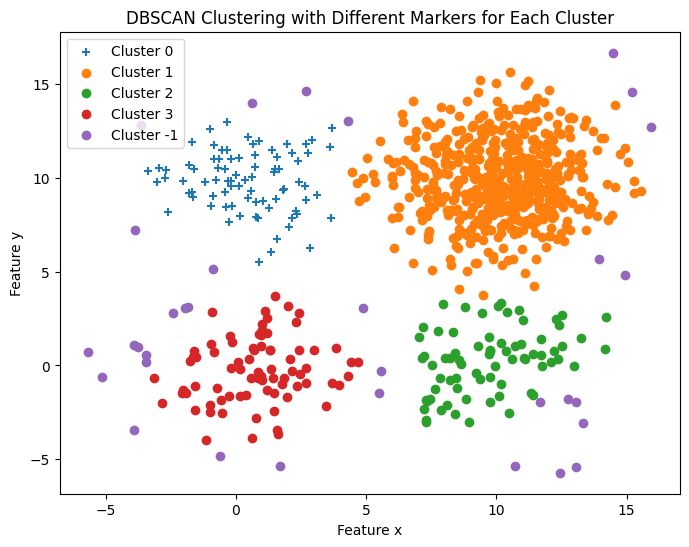

In [66]:
start_time = time.time()
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
print("K-means clustering cluster time cost: %0.4s Seconds"%(time.time() - start_time))
df_train['dbscan_label'] = dbscan.fit_predict(X_train)
# Separate data into clusters
unique_labels = df_train['dbscan_label'].unique()

# Visualize the results with different marker symbols for each cluster
plt.figure(figsize=(8, 6))
for label in unique_labels:
    cluster_mask = (df_train['dbscan_label'] == label)
    marker = '+' if label == 0 else 'o'  # Use "+" for noise points, "o" for other clusters
    plt.scatter(df_train[cluster_mask]['x'], df_train[cluster_mask]['y'],
                label=f'Cluster {label}', marker=marker)

plt.title("DBSCAN Clustering with Different Markers for Each Cluster")
plt.xlabel("Feature x")
plt.ylabel("Feature y")
plt.legend()
plt.show()

In [68]:
# map k mean cluster to y class
labels = dbscan.fit_predict(X_train)
y = []
for i in labels:
    if i == 0:
        y.append(2)
    elif i == 1:
        y.append(0)
    elif i == 2:
        y.append(1)
    else:
        y.append(3)
accuracy = accuracy_score(Y_train, y)
print("Accuracy:", accuracy)

Accuracy: 0.97125


In [69]:
from sklearn.metrics import pairwise_distances
import numpy as np
from scipy.stats import entropy
# Assuming df_train['dbscan_label'] contains the cluster labels
cluster_labels = df_train['dbscan_label'].values

# Calculate the pairwise distance matrix
distance_matrix = pairwise_distances(X_train)

# Calculate the entropy for each cluster
unique_labels = np.unique(cluster_labels)
cluster_entropies = []

for label in unique_labels:
    # Select data points belonging to the current cluster
    cluster_mask = (cluster_labels == label)
    cluster_points = distance_matrix[cluster_mask][:, cluster_mask]

    # Calculate the sum of distances within the cluster
    sum_distances_within_cluster = np.sum(cluster_points)

    # Calculate the entropy for the cluster
    cluster_entropy = entropy(cluster_points.flatten()) if sum_distances_within_cluster > 0 else 0
    cluster_entropies.append(cluster_entropy)

# Calculate the overall entropy (weighted average of cluster entropies)
total_points = len(X_train)
weighted_entropies = [ent * np.sum(cluster_labels == label) / total_points for label, ent in zip(unique_labels, cluster_entropies)]
overall_entropy = np.sum(weighted_entropies)

print(f"Overall Entropy: {overall_entropy}")


Overall Entropy: 11.07963460066781


In [70]:
linkage_matrix = linkage(X_train, method='ward')

# Define the number of clusters you want
flat_clusters = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

# Calculate SSE manually
def calculate_sse(X, labels, flat_clusters):
    sse = 0
    for cluster in range(1, n_clusters + 1):
        cluster_points = X[flat_clusters == cluster]
        cluster_center = np.mean(cluster_points, axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    return sse

sse = calculate_sse(X_train, labels, flat_clusters)
print("SSE:", sse)

SSE: x    3367.556765
y    3366.759563
dtype: float64


C:\Users\Ken\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
